# Indian Geography Journal Title Analysis

Use a list of titles in `data.txt` and compute just bare word frequency and then compute TF-IDF. This should give us a representation of how important words are in titles of articles.

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import string

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

import matplotlib.pyplot as plt

## Read in data

Just read each line and strip out the whitespace on the ends - do more processing later

In [2]:
file_path = "data.txt"
lines = []
with open(file_path, "r") as file:
    lines = [line.strip() for line in file]

## Word Frequency

1. Create tools 
    * Download nltk data
    * Create lemmatizer from nltk as well
2. Create stopwords  
    * ntlk stopwords
    * punctuation
    * empty strings, and \'s
3. Create corpus
    * Join the lines into a corpus
    * tokenize the words with nltk
    * strip out punctuation from the words
    * take out stop words, and then lemmatize the words (and lower them)
4. Count words
    * Use counter and count the frequencies
    * sort the words by frequency
6. Plot the results
7. Write out data
    * Just write term and frequency each line in order

In [3]:
nltk.download(['wordnet', 'stopwords', 'punkt'])
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jovyan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
stop_words = set(list(stopwords.words('english')) + list(string.punctuation) + ["'s", ""])

In [5]:
words = [word.strip(string.punctuation) for word in nltk.word_tokenize(" ".join(lines))]
filtered_words = [lemmatizer.lemmatize(word).lower() for word in words if word.lower() not in stop_words]

In [6]:
sorted_word_freq = sorted(Counter(filtered_words).items(), key=lambda x: x[1], reverse=True)

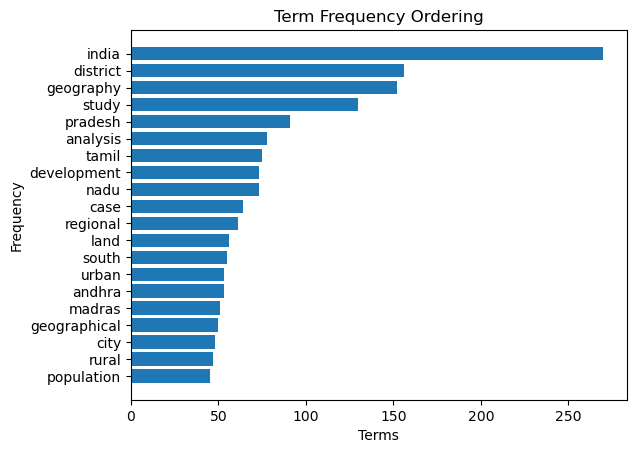

In [7]:
plt.barh([i[0] for i in reversed(sorted_word_freq[:20])], [i[1] for i in reversed(sorted_word_freq[:20])])
plt.xlabel('Terms'), plt.ylabel('Frequency'), plt.title('Term Frequency Ordering')
plt.show()

In [8]:
file_path = "frequency.txt"
with open(file_path, "w") as file:
    for word, freq in sorted_word_freq:
        file.write(f"{word}: {freq}\n")

# TF-IDF
1. Use sklearn to create a vectorizer
    * max_df - include almost all words
    * max_features - I want to include all words (~2500 unique words in the text)
    * English, because we are dealing with english
2. Create a matrix of tf-idf features for each of the titles
3. Respectively sum the tf-idf values for each word across each of the titles
4. Retrieve the terms from the vectorizer 
5. Create a dictionary of terms and tfidf scores
    * Just zip the arrays because they are both in alphanumeric order
6. Sort the dictionary of terms and tfidf scores by tfidf score
7. Plot the results
8. Write out results
    * Write out each term and tfidf score on each line

In [9]:
vectorizer = TfidfVectorizer(max_df=0.95, max_features=3000, stop_words='english')
matrix = vectorizer.fit_transform(lines)

In [10]:
tfidf_sum = np.sum(matrix, axis=0)

In [11]:
terms = vectorizer.get_feature_names_out()
term_dict = {term: score for term, score in zip(terms, tfidf_sum.tolist()[0])}

In [12]:
sorted_term_dict = sorted(term_dict.items(), key=lambda x: x[1], reverse=True)

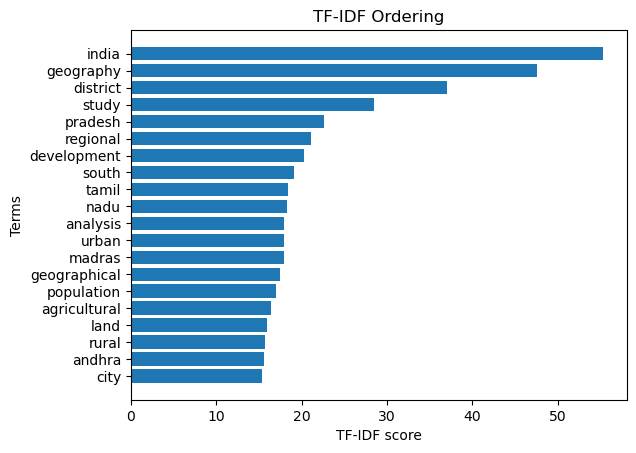

In [13]:
plt.barh([i[0] for i in reversed(sorted_term_dict[:20])], [i[1] for i in reversed(sorted_term_dict[:20])])
plt.xlabel('TF-IDF score'), plt.ylabel('Terms'), plt.title('TF-IDF Ordering')
plt.show()

In [14]:
file_path = "tf-idf.txt"
with open(file_path, "w") as file:
    for term, score in sorted_term_dict:
        file.write(f"{term}: {score}\n")